In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Reading the wine dataset

In [5]:
df = pd.read_csv("wine1.csv")

In [6]:
df

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,Barolo,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,Barolo,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,Barolo,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,Barolo,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,Barolo,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


# Checking misssing values in dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
class_label             178 non-null int64
class_name              178 non-null object
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
alcalinity_of_ash       178 non-null float64
magnesium               178 non-null int64
total_phenols           178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280                   178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3), object(1)
memory usage: 20.9+ KB


Checking the missing values can also be done using the below code

In [8]:
df[df.isnull().any(axis=1)]

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline


The features in the dataframe doesn't have any missing values.

# Detecting the outliers in few features

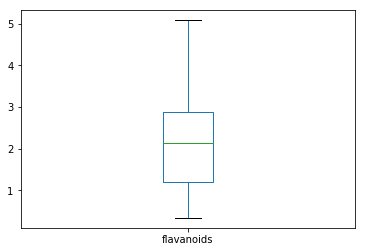

In [11]:
#Flavanoids ouliter detection
df.flavanoids.plot(kind='box')
plt.show()

No outliers in flavanoids

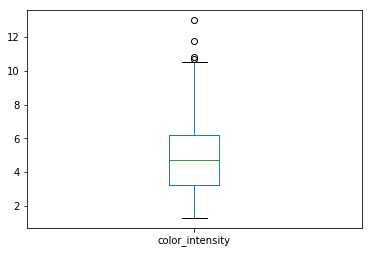

In [12]:
#Color_intensity outlier detection
df.color_intensity.plot(kind='box')
plt.show()

There are outliers in color_intensity

In [21]:
#Using IQR method
q1= df['color_intensity'].quantile(.25) # Q1
q3= df['color_intensity'].quantile(.75) #Q3
iqr = q3-q1 # IQR value
uw= q3+1.5*iqr # upper whiske
ou= df[df['color_intensity'] > uw] # detecting the otliers


In [22]:
ou # These are the outliers in color_intensity feature

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
151,3,Barbera,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,3,Barbera,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,3,Barbera,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,3,Barbera,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


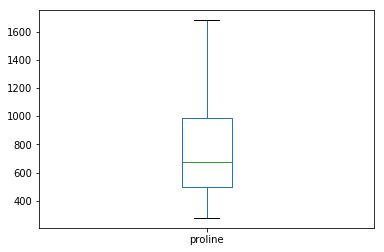

In [13]:
#Proline outlier detection
df.proline.plot(kind='box')
plt.show()

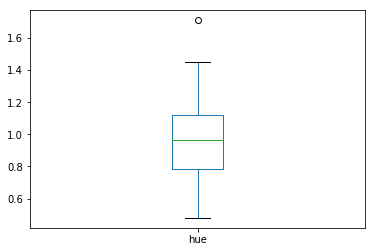

In [23]:
#hue outlier detection
df.hue.plot(kind='box')
plt.show()

The above boxplot shows we have 1 outlier

In [24]:
#Using IQR method
q1= df['hue'].quantile(.25) # Q1
q3= df['hue'].quantile(.75) #Q3
iqr = q3-q1 # IQR value
uw= q3+1.5*iqr # upper whiske
ou1= df[df['hue'] > uw] # detecting the otliers


In [25]:
ou1 # high outlier

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
115,2,Grignolino,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


# Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.drop(['class_label','class_name'],axis=1)
# Separating out the target
y = df['class_label']
# Standardizing the features
x1 = StandardScaler().fit_transform(x)
print (x1)
print (y)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173  

# Principle Component Analysis

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(x1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8','comp9', 'comp10','comp11', 'comp12','comp13'])

In [32]:
principalDf # Transformed features

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


In [33]:
#Cumulative proportion of all 13 transformed features
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


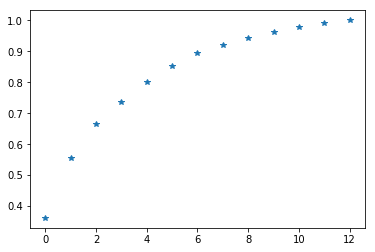

In [84]:
#Plotting the cumulative proportion
c= np.array(pca.explained_variance_ratio_.cumsum())
plt.plot(c,'*')
plt.show()

# Accuracy without PCA and logistic model

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
LR1 = LogisticRegression()
LR1.fit(x_train, y_train)
y1_predict = LR1.predict(x_test)
y1_acc = metrics.accuracy_score(y_test,y1_predict)
print("Accuracy without PCA")
print(y1_acc)
y1_cm=metrics.confusion_matrix(y_test,y1_predict)
print(y1_cm)

Accuracy without PCA
0.9444444444444444
[[18  2  0]
 [ 0 20  0]
 [ 0  1 13]]


# Accuracy with PCA and logistic model

In [62]:

x2 = principalDf # features
x1_train, x1_test, y1_train, y1_test = train_test_split(x2, y, test_size=0.3, random_state=2) # y is target
LR1 = LogisticRegression()
LR1.fit(x1_train, y1_train)
y2_predict = LR1.predict(x1_test)
y2_acc = metrics.accuracy_score(y1_test,y2_predict)
print("Accuracy without PCA")
print(y2_acc)
y2_cm=metrics.confusion_matrix(y1_test,y2_predict)
print(y2_cm)

Accuracy without PCA
1.0
[[20  0  0]
 [ 0 20  0]
 [ 0  0 14]]


#  Accuracy with PCA and logistic model(n=5)

In [64]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=5)
principalComponents = pca1.fit_transform(x1)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5'])

In [76]:
x3 = principalDf1 # features
x1_train, x1_test, y1_train, y1_test = train_test_split(x3, y, test_size=0.3, random_state=2) # y is target
LR1 = LogisticRegression()
LR1.fit(x1_train, y1_train)
y3_predict = LR1.predict(x1_test)
y3_acc = metrics.accuracy_score(y1_test,y3_predict)
print("Accuracy with PCA and n=5")
print(y3_acc)
y3_cm=metrics.confusion_matrix(y1_test,y3_predict)
print(y3_cm)

Accuracy with PCA and n=5
0.9814814814814815
[[19  1  0]
 [ 0 20  0]
 [ 0  0 14]]


#  Accuracy with PCA and logistic model(n=8)

In [67]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=8)
principalComponents = pca2.fit_transform(x1)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['comp1', 'comp2','comp3', 'comp4','comp5', 'comp6','comp7', 'comp8'])

In [77]:
x4 = principalDf2 # features
x1_train, x1_test, y1_train, y1_test = train_test_split(x4, y, test_size=0.3, random_state=2) # y is target
LR1 = LogisticRegression()
LR1.fit(x1_train, y1_train)
y4_predict = LR1.predict(x1_test)
y4_acc = metrics.accuracy_score(y1_test,y4_predict)
print("Accuracy with PCA and n=8")
print(y2_acc)
y4_cm=metrics.confusion_matrix(y1_test,y4_predict)
print(y4_cm)

Accuracy with PCA and n=8
1.0
[[20  0  0]
 [ 0 20  0]
 [ 0  0 14]]


# Comparing specificity with and without PCA for logistic

# Specificity without PCA for logistic

In [75]:
#Specificity
TNR=y1_cm[0,0]/(y1_cm[0,0]+y1_cm[0,1])
print("Specificity without PCA for logistic is %1.3f"% TNR )


Specificity without PCA for logistic is 0.900


0.9

# Specificity with PCA for logistic

In [78]:
#Specificity
TNR1=y2_cm[0,0]/(y2_cm[0,0]+y2_cm[0,1])
print("Specificity without PCA for logistic is %1.3f"% TNR1 )

Specificity without PCA for logistic is 1.000


# Specificity is greater with PCA than without for logistic